In [0]:
import pandas as pd
import numpy as np

from google.colab import files
import io
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import argmax
import seaborn as sb

from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier


##Upload the dataset to pandas data frame

In [0]:
df = pd.read_csv("Motor_Vehicle_Crashes.csv")

In [141]:
df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2016,13364180,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2015.0,NY,2.0,4.0,NISSA,HUMAN,Fell Asleep,HUMAN,Unknown,Not Applicable,KNMAT2MV1FP544486,Property Damage Accident,17:14,12/31/2016,Saturday,Y,Dark-Road Unlighted,MARTINSBURG,OTHER,LEWIS,Curve and Grade,Cloudy,None,Wet,26 74061244,Not Applicable,Deer,1
1,2016,13364181,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Merging,Not Entered,South,Gas,2007.0,NY,1.0,4.0,HYUND,HUMAN,Alcohol Involvement,HUMAN,Not Applicable,Not Entered,5NPET46C87H227617,Property Damage Accident,5:30,12/31/2016,Saturday,Y,Dark-Road Unlighted,BROOKHAVEN,SIDESWIPE,SUFFOLK,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2016,13364182,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2009.0,NY,1.0,4.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Entered,1HGCP26379A133398,Property Damage & Injury Accident,11:02,12/31/2016,Saturday,Y,Daylight,MILFORD,LEFT TURN (3),OTSEGO,Straight and Level,Cloudy,No Passing Zone,Wet,7 94033029,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2016,13364283,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,DODGE,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1B3HB28B37D582730,Injury Accident,15:20,12/31/2016,Saturday,N,Unknown,KINGS,Unknown,KINGS,Unknown,Unknown,Unknown,Unknown,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108,Property Damage Accident,8:52,12/31/2016,Saturday,Y,Daylight,RENSSELAER,LEFT TURN (3),RENSSELAER,Straight and Grade,Clear,Traffic Signal,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2


In [142]:
df['Crash Descriptor'].head()

0             Property Damage Accident
1             Property Damage Accident
2    Property Damage & Injury Accident
3                      Injury Accident
4             Property Damage Accident
Name: Crash Descriptor, dtype: object

##Display the information of all the features

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337772 entries, 0 to 337771
Data columns (total 36 columns):
Year                                 337772 non-null int64
Case Vehicle ID                      337772 non-null int64
Vehicle Body Type                    337772 non-null object
Registration Class                   337772 non-null object
Action Prior to Accident             337772 non-null object
Type / Axles of Truck or Bus         337772 non-null object
Direction of Travel                  337772 non-null object
Fuel Type                            337772 non-null object
Vehicle Year                         292433 non-null float64
State of Registration                314329 non-null object
Number of Occupants                  308643 non-null float64
Engine Cylinders                     271903 non-null float64
Vehicle Make                         292749 non-null object
Contributing Factor 1                337770 non-null object
Contributing Factor 1 Description    337770 non-

In [144]:
df['Crash Descriptor'].value_counts()

Property Damage Accident             201734
Injury Accident                       71244
Property Damage & Injury Accident     63722
Fatal Accident                         1072
Name: Crash Descriptor, dtype: int64

##Display all the columns

In [145]:
df.columns

Index(['Year', 'Case Vehicle ID', 'Vehicle Body Type', 'Registration Class',
       'Action Prior to Accident', 'Type / Axles of Truck or Bus',
       'Direction of Travel', 'Fuel Type', 'Vehicle Year',
       'State of Registration', 'Number of Occupants', 'Engine Cylinders',
       'Vehicle Make', 'Contributing Factor 1',
       'Contributing Factor 1 Description', 'Contributing Factor 2',
       'Contributing Factor 2 Description', 'Event Type', 'Partial VIN',
       'Crash Descriptor', 'Time', 'Date', 'Day of Week', 'Police Report',
       'Lighting Conditions', 'Municipality', 'Collision Type Descriptor',
       'County Name', 'Road Descriptor', 'Weather Conditions',
       'Traffic Control Device', 'Road Surface Conditions',
       'DOT Reference Marker Location', 'Pedestrian Bicyclist Action',
       'Event Descriptor', 'Number of Vehicles Involved'],
      dtype='object')

##Drop the columns that are not considered for the analysis

In [0]:
df.drop(['Type / Axles of Truck or Bus','DOT Reference Marker Location','Partial VIN','Vehicle Year','State of Registration','Engine Cylinders','Contributing Factor 2 Description','Contributing Factor 2'],axis=1,inplace=True)

##View the statistical summary of the data

In [147]:
df.describe()

,Year,Case Vehicle ID,Number of Occupants,Number of Vehicles Involved
count,337772.000000,3.377720e+05,308643.000000,337772.000000
mean,2015.893807,1.354624e+07,1.356444,1.776204
std,0.308133,3.789486e+05,2.090911,0.646013
min,2014.000000,1.203628e+07,0.000000,1.000000
25%,2016.000000,1.349514e+07,1.000000,1.000000
50%,2016.000000,1.364898e+07,1.000000,2.000000
75%,2016.000000,1.377944e+07,1.000000,2.000000
max,2016.000000,1.393012e+07,881.000000,31.000000


##Make a copy of the data frame

In [0]:
dfcpy = df.copy(deep=True)

In [149]:
dfcpy.columns

Index(['Year', 'Case Vehicle ID', 'Vehicle Body Type', 'Registration Class',
       'Action Prior to Accident', 'Direction of Travel', 'Fuel Type',
       'Number of Occupants', 'Vehicle Make', 'Contributing Factor 1',
       'Contributing Factor 1 Description', 'Event Type', 'Crash Descriptor',
       'Time', 'Date', 'Day of Week', 'Police Report', 'Lighting Conditions',
       'Municipality', 'Collision Type Descriptor', 'County Name',
       'Road Descriptor', 'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'Pedestrian Bicyclist Action',
       'Event Descriptor', 'Number of Vehicles Involved'],
      dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337772 entries, 0 to 337771
Data columns (total 28 columns):
Year                                 337772 non-null int64
Case Vehicle ID                      337772 non-null int64
Vehicle Body Type                    337772 non-null object
Registration Class                   337772 non-null object
Action Prior to Accident             337772 non-null object
Direction of Travel                  337772 non-null object
Fuel Type                            337772 non-null object
Number of Occupants                  308643 non-null float64
Vehicle Make                         292749 non-null object
Contributing Factor 1                337770 non-null object
Contributing Factor 1 Description    337770 non-null object
Event Type                           329862 non-null object
Crash Descriptor                     337772 non-null object
Time                                 337772 non-null object
Date                                 337772 non-nu

In [151]:
df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Direction of Travel,Fuel Type,Number of Occupants,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Event Type,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2016,13364180,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,East,Gas,2.0,NISSA,HUMAN,Fell Asleep,Not Applicable,Property Damage Accident,17:14,12/31/2016,Saturday,Y,Dark-Road Unlighted,MARTINSBURG,OTHER,LEWIS,Curve and Grade,Cloudy,None,Wet,Not Applicable,Deer,1
1,2016,13364181,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Merging,South,Gas,1.0,HYUND,HUMAN,Alcohol Involvement,Not Entered,Property Damage Accident,5:30,12/31/2016,Saturday,Y,Dark-Road Unlighted,BROOKHAVEN,SIDESWIPE,SUFFOLK,Straight and Level,Clear,None,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2016,13364182,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,South,Gas,1.0,HONDA,HUMAN,Not Applicable,Not Entered,Property Damage & Injury Accident,11:02,12/31/2016,Saturday,Y,Daylight,MILFORD,LEFT TURN (3),OTSEGO,Straight and Level,Cloudy,No Passing Zone,Wet,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2016,13364283,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,North,Gas,1.0,DODGE,ENVMT,Pavement Slippery,Not Applicable,Injury Accident,15:20,12/31/2016,Saturday,N,Unknown,KINGS,Unknown,KINGS,Unknown,Unknown,Unknown,Unknown,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,West,Gas,1.0,MINI,HUMAN,Unsafe Lane Changing,Not Applicable,Property Damage Accident,8:52,12/31/2016,Saturday,Y,Daylight,RENSSELAER,LEFT TURN (3),RENSSELAER,Straight and Grade,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2


In [152]:
df['Lighting Conditions'].value_counts()

Daylight               204543
Dark-Road Lighted       58290
Dark-Road Unlighted     33247
Unknown                 24596
Dusk                     9994
Dawn                     7102
Name: Lighting Conditions, dtype: int64

##Dropping the NaN values as the number of samples with NaN values is appreciably small compared to the total number of samples

In [0]:
df.dropna(inplace=True)

##Sample the data

In [0]:
df=df.sample(frac=0.15, random_state=1)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 66021 to 182589
Data columns (total 28 columns):
Year                                 41057 non-null int64
Case Vehicle ID                      41057 non-null int64
Vehicle Body Type                    41057 non-null object
Registration Class                   41057 non-null object
Action Prior to Accident             41057 non-null object
Direction of Travel                  41057 non-null object
Fuel Type                            41057 non-null object
Number of Occupants                  41057 non-null float64
Vehicle Make                         41057 non-null object
Contributing Factor 1                41057 non-null object
Contributing Factor 1 Description    41057 non-null object
Event Type                           41057 non-null object
Crash Descriptor                     41057 non-null object
Time                                 41057 non-null object
Date                                 41057 non-null object
Da

In [157]:
df.describe()

,Year,Case Vehicle ID,Number of Occupants,Number of Vehicles Involved
count,41057.000000,4.105700e+04,41057.000000,41057.000000
mean,2015.880849,1.352711e+07,1.349441,1.773875
std,0.323971,3.945851e+05,1.312724,0.633653
min,2015.000000,1.246527e+07,0.000000,1.000000
25%,2016.000000,1.347796e+07,1.000000,1.000000
50%,2016.000000,1.363849e+07,1.000000,2.000000
75%,2016.000000,1.377057e+07,1.000000,2.000000
max,2016.000000,1.391220e+07,80.000000,13.000000


##Count plot of different features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

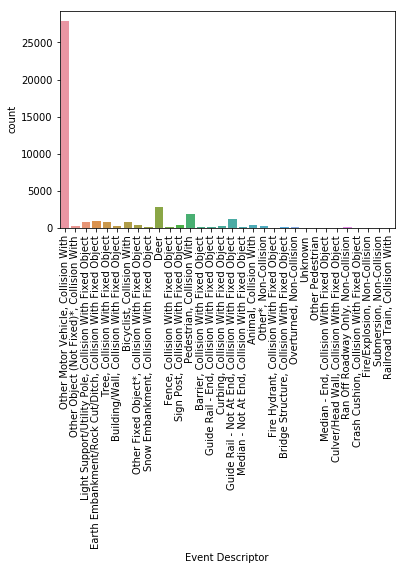

In [0]:
sb.countplot(df['Event Descriptor'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

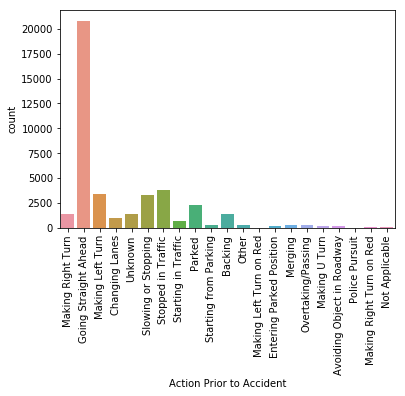

In [0]:
sb.countplot(df['Action Prior to Accident'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

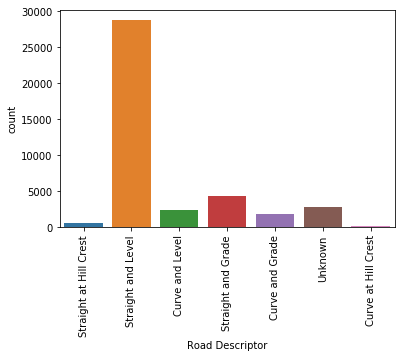

In [64]:
sb.countplot(df['Road Descriptor'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

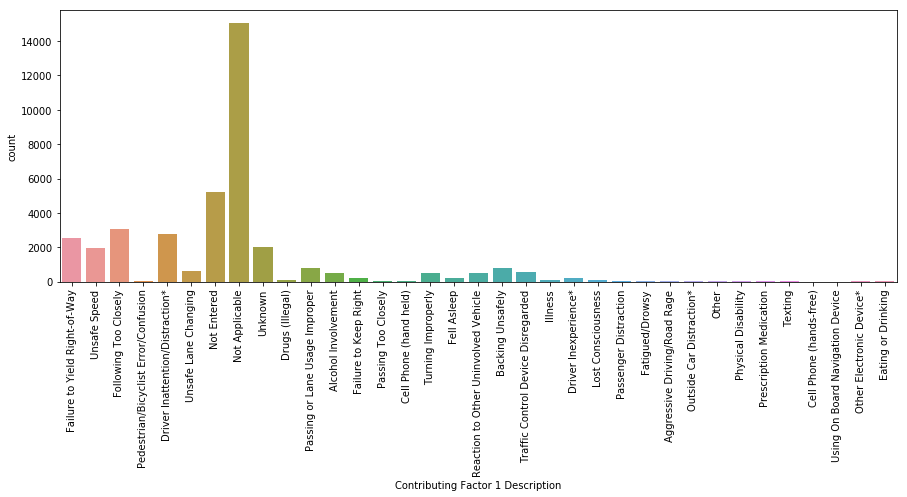

In [69]:
plt.figure(figsize=(15,5))
sb.countplot(df['Contributing Factor 1 Description'][df['Contributing Factor 1']=='HUMAN'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text xticklabel objects>)

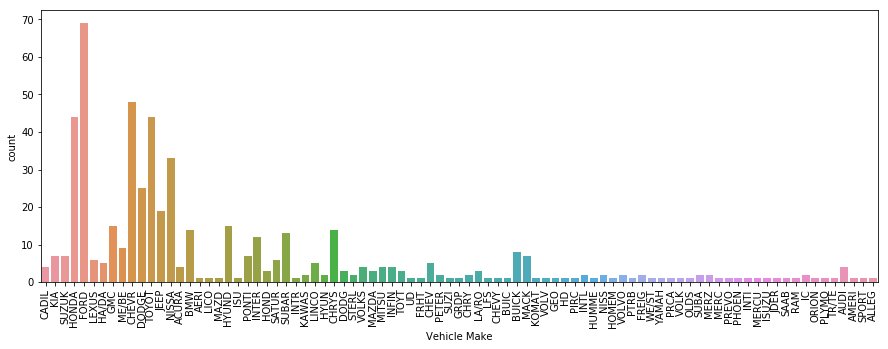

In [0]:
plt.figure(figsize=(15,5))
sb.countplot(df['Vehicle Make'][df['Contributing Factor 1']=='VEHICLE'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

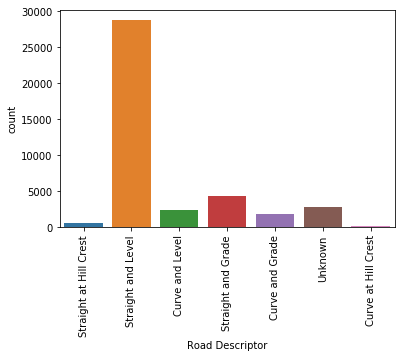

In [0]:
sb.countplot(df['Road Descriptor'])
plt.xticks(rotation = 90)

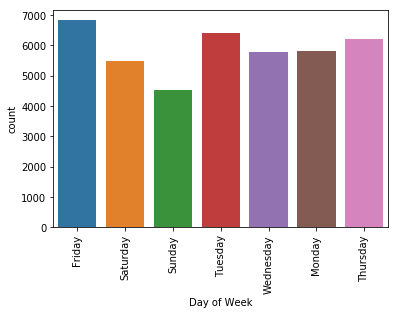

In [0]:
plt.xticks(rotation = 90)
sb.countplot(df['Day of Week'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

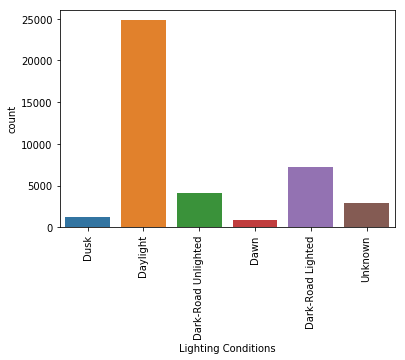

In [0]:
sb.countplot(df['Lighting Conditions'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

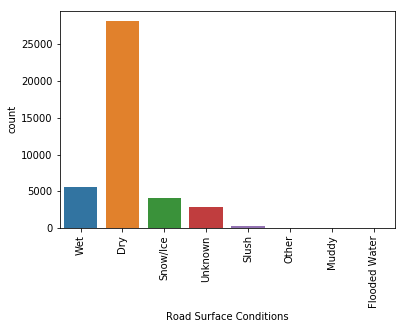

In [0]:
sb.countplot(df['Road Surface Conditions'])
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

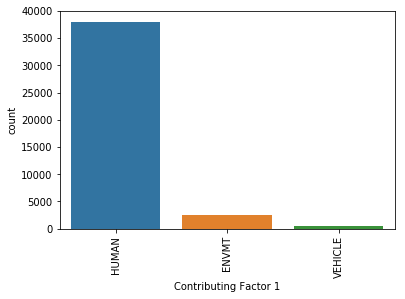

In [0]:
sb.countplot(df['Contributing Factor 1'])
plt.xticks(rotation = 90)

In [75]:
df.Time[df['Day of Week']=='Friday'].value_counts()

0:00     187
16:00     67
17:00     60
18:00     59
15:30     59
15:00     49
8:00      48
9:00      45
17:30     44
14:30     44
14:00     43
13:00     43
19:00     42
18:30     41
16:45     41
10:00     41
12:00     38
17:45     35
16:30     35
13:30     34
11:00     34
10:30     33
11:30     30
7:00      29
14:45     28
20:00     28
8:30      28
7:30      27
21:30     27
16:15     27
        ... 
4:01       1
8:31       1
1:31       1
19:03      1
7:41       1
2:53       1
5:51       1
2:32       1
18:49      1
13:57      1
20:36      1
0:39       1
12:39      1
18:32      1
1:28       1
0:14       1
23:11      1
9:33       1
0:13       1
19:41      1
0:43       1
23:13      1
23:22      1
22:02      1
18:39      1
11:13      1
6:22       1
0:12       1
23:34      1
2:13       1
Name: Time, Length: 1221, dtype: int64

##Label encoding the target feature

In [79]:
le = LabelEncoder()
df['lightcon'] = le.fit_transform(df['Lighting Conditions'])
df[['lightcon','Lighting Conditions']].head()

,lightcon,Lighting Conditions
66021,4,Dusk
310704,3,Daylight
94278,1,Dark-Road Unlighted
199295,2,Dawn
259801,1,Dark-Road Unlighted


##Check for features with string data type

In [81]:
strings = ['object']
df.select_dtypes(include=strings).columns

Index(['Vehicle Body Type', 'Registration Class', 'Action Prior to Accident',
       'Direction of Travel', 'Fuel Type', 'Vehicle Make',
       'Contributing Factor 1', 'Contributing Factor 1 Description',
       'Event Type', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
       'Police Report', 'Lighting Conditions', 'Municipality',
       'Collision Type Descriptor', 'County Name', 'Road Descriptor',
       'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'Pedestrian Bicyclist Action',
       'Event Descriptor'],
      dtype='object')

##Onehot encode the categorical data

In [0]:
df_trans = pd.get_dummies(df, columns=['Vehicle Body Type', 'Registration Class', 'Action Prior to Accident',
       'Direction of Travel', 'Fuel Type', 'Vehicle Make',
       'Contributing Factor 1', 'Contributing Factor 1 Description',
       'Event Type', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
       'Police Report', 'Lighting Conditions', 'Municipality',
       'Collision Type Descriptor', 'County Name', 'Road Descriptor',
       'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'Pedestrian Bicyclist Action',
       'Event Descriptor'])

##Split the data into train and test samples

In [0]:
trainx, testx = train_test_split(df_trans.drop('lightcon', axis=1), random_state=1)
trainy, testy = train_test_split(df_trans.lightcon, random_state=1)

In [84]:
trainx.shape

(30792, 3785)

In [85]:
trainy.shape

(30792,)

##Fit a SVM model on the train data

In [86]:
lsm = svm.LinearSVC(C = 1e9)
lsm.fit(trainx,trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

##Print the accuracy and confusion matrix

In [102]:
print(accuracy_score(lsm.predict(trainx),trainy))
print(confusion_matrix(lsm.predict(trainx),trainy))

0.6060340348142375
[[    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [ 5377  3039   627 18661   924  2164]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]]


In [89]:
print(accuracy_score(lsm.predict(testx),testy))
print(confusion_matrix(lsm.predict(testx),testy))

0.5999025815879201
[[   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [1835 1021  207 6158  310  734]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


##Fit a random forest classifier on the train data

In [90]:
rfc = RandomForestClassifier(n_estimators=15, oob_score=True)
rfc.fit(trainx, trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


1.0

##Print the accuracy and confusion matrix

In [103]:
print(accuracy_score(rfc.predict(trainx),trainy))
print(confusion_matrix(rfc.predict(trainx),trainy))

1.0
[[ 5377     0     0     0     0     0]
 [    0  3039     0     0     0     0]
 [    0     0   627     0     0     0]
 [    0     0     0 18661     0     0]
 [    0     0     0     0   924     0]
 [    0     0     0     0     0  2164]]


In [93]:
print(accuracy_score(rfc.predict(testx),testy))
print(confusion_matrix(rfc.predict(testx),testy))

0.9952264978080857
[[1834    7   14    1    8    3]
 [   0 1012    1    0    0    0]
 [   0    0  189    0    0    0]
 [   1    1    3 6156    4    3]
 [   0    0    0    0  297    0]
 [   0    1    0    1    1  728]]


##Fit knn on the train data set

In [94]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(trainx,trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

##Print the accuracy and confusion matrix

In [95]:
print(accuracy_score(knn.predict(trainx),trainy))
print(confusion_matrix(knn.predict(trainx),trainy))

0.6210054559625877
[[ 1366   433    90  1017   142   253]
 [  138   338    22   233    42    45]
 [    1     2     3     2     1     2]
 [ 3863  2264   508 17395   737  1844]
 [    0     0     0     1     0     0]
 [    9     2     4    13     2    20]]


In [96]:
print(accuracy_score(knn.predict(testx),testy))
print(confusion_matrix(knn.predict(testx),testy))

0.5652216268874818
[[ 274  176   18  539   44   90]
 [  59   51    9  133   12   19]
 [   0    0    0    1    0    0]
 [1497  789  180 5475  254  623]
 [   0    0    0    1    0    0]
 [   5    5    0    9    0    2]]


In [97]:
pip install xgboost

##Fit an XGBoost classifier on train data set

In [0]:
xg = XGBClassifier()

In [99]:
xg.fit(trainx,trainy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

##Print the accuracy and confusion matrix

In [100]:
print(accuracy_score(xg.predict(trainx),trainy))
print(confusion_matrix(xg.predict(trainx),trainy))

1.0
[[ 5377     0     0     0     0     0]
 [    0  3039     0     0     0     0]
 [    0     0   627     0     0     0]
 [    0     0     0 18661     0     0]
 [    0     0     0     0   924     0]
 [    0     0     0     0     0  2164]]


In [104]:
print(accuracy_score(xg.predict(testx),testy))
print(confusion_matrix(xg.predict(testx),testy))

1.0
[[1835    0    0    0    0    0]
 [   0 1021    0    0    0    0]
 [   0    0  207    0    0    0]
 [   0    0    0 6158    0    0]
 [   0    0    0    0  310    0]
 [   0    0    0    0    0  734]]


##Drop the target feature created

In [0]:
df = df.drop('lightcon',axis=1)

In [106]:
df['Weather Conditions'].value_counts()

Clear                       23361
Cloudy                       8549
Rain                         2959
Unknown                      2902
Snow                         2653
Sleet/Hail/Freezing Rain      509
Fog/Smog/Smoke                 97
Other*                         27
Name: Weather Conditions, dtype: int64

##Label encode 'weather conditions' to get the target variable

In [107]:
df['weathercon'] = le.fit_transform(df['Weather Conditions'])
df[['weathercon','Weather Conditions']].head()

,weathercon,Weather Conditions
66021,1,Cloudy
310704,6,Snow
94278,1,Cloudy
199295,1,Cloudy
259801,0,Clear


In [0]:
df_trans = pd.get_dummies(df, columns=['Vehicle Body Type', 'Registration Class', 'Action Prior to Accident',
       'Direction of Travel', 'Fuel Type', 'Vehicle Make',
       'Contributing Factor 1', 'Contributing Factor 1 Description',
       'Event Type', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
       'Police Report', 'Lighting Conditions', 'Municipality',
       'Collision Type Descriptor', 'County Name', 'Road Descriptor',
       'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'Pedestrian Bicyclist Action',
       'Event Descriptor'])

In [0]:
trainx, testx = train_test_split(df_trans.drop('weathercon', axis=1), random_state=1)
trainy, testy = train_test_split(df_trans.weathercon, random_state=1)

In [110]:
lsm = svm.LinearSVC(C = 1e6)
lsm.fit(trainx,trainy)
print(accuracy_score(lsm.predict(trainx),trainy))
print(confusion_matrix(lsm.predict(trainx),trainy))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.20674201091192518
[[    0     0     0     0     0     0     0     0]
 [17614  6366    72    22  2207   371  1972  2168]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


In [111]:
print(accuracy_score(lsm.predict(testx),testy))
print(confusion_matrix(lsm.predict(testx),testy))

0.2126643935703848
[[   0    0    0    0    0    0    0    0]
 [5747 2183   25    5  752  138  681  734]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainx,trainy)
print(accuracy_score(knn.predict(trainx),trainy))
print(confusion_matrix(knn.predict(trainx),trainy))

0.6794621979734996
[[16337  3467    51    15   759    51   573  1560]
 [  858  2445    10     4   424    51   267   299]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [  176   195    11     2   892    70    83   102]
 [   16    21     0     0    34   149    39    12]
 [  176   200     0     0    87    48   994    90]
 [   51    38     0     1    11     2    16   105]]


In [113]:
print(accuracy_score(knn.predict(testx),testy))
print(confusion_matrix(knn.predict(testx),testy))

0.5694106186069167
[[4905 1483   14    3  312   21  244  558]
 [ 599  451    4    1  159   20  151   87]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [  90  112    7    0  221   35   34   37]
 [   5   12    0    0   26   33   17   10]
 [ 116  114    0    1   30   27  224   31]
 [  32   11    0    0    4    2   11   11]]


In [114]:
rfc = RandomForestClassifier(n_estimators=15, oob_score=True)
rfc.fit(trainx, trainy)
print(accuracy_score(rfc.predict(trainx),trainy))
print(confusion_matrix(rfc.predict(trainx),trainy))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


1.0
[[17614     0     0     0     0     0     0     0]
 [    0  6366     0     0     0     0     0     0]
 [    0     0    72     0     0     0     0     0]
 [    0     0     0    22     0     0     0     0]
 [    0     0     0     0  2207     0     0     0]
 [    0     0     0     0     0   371     0     0]
 [    0     0     0     0     0     0  1972     0]
 [    0     0     0     0     0     0     0  2168]]


In [115]:
print(accuracy_score(rfc.predict(testx),testy))
print(confusion_matrix(rfc.predict(testx),testy))

0.9969800292255236
[[5746    1    4    2    2    6    0    3]
 [   1 2182    0    1    0    4    0    2]
 [   0    0   19    0    0    0    0    0]
 [   0    0    0    2    0    0    0    0]
 [   0    0    2    0  749    1    0    0]
 [   0    0    0    0    0  127    0    0]
 [   0    0    0    0    1    0  681    1]
 [   0    0    0    0    0    0    0  728]]


In [116]:
xg.fit(trainx,trainy)
print(accuracy_score(xg.predict(trainx),trainy))
print(confusion_matrix(xg.predict(trainx),trainy))

1.0
[[17614     0     0     0     0     0     0     0]
 [    0  6366     0     0     0     0     0     0]
 [    0     0    72     0     0     0     0     0]
 [    0     0     0    22     0     0     0     0]
 [    0     0     0     0  2207     0     0     0]
 [    0     0     0     0     0   371     0     0]
 [    0     0     0     0     0     0  1972     0]
 [    0     0     0     0     0     0     0  2168]]


In [117]:
print(accuracy_score(xg.predict(testx),testy))
print(confusion_matrix(xg.predict(testx),testy))

1.0
[[5747    0    0    0    0    0    0    0]
 [   0 2183    0    0    0    0    0    0]
 [   0    0   25    0    0    0    0    0]
 [   0    0    0    5    0    0    0    0]
 [   0    0    0    0  752    0    0    0]
 [   0    0    0    0    0  138    0    0]
 [   0    0    0    0    0    0  681    0]
 [   0    0    0    0    0    0    0  734]]


In [0]:
df = df.drop('weathercon',axis=1)

In [119]:
df['Road Surface Conditions'].value_counts()

Dry              28186
Wet               5542
Snow/Ice          4125
Unknown           2852
Slush              268
Other               56
Muddy               17
Flooded Water       11
Name: Road Surface Conditions, dtype: int64

##Label encode 'Road Surface Conditions' to obtain the target feature

In [120]:
df['roadcon'] = le.fit_transform(df['Road Surface Conditions'])
df[['roadcon','Road Surface Conditions']].head()

,roadcon,Road Surface Conditions
66021,7,Wet
310704,7,Wet
94278,7,Wet
199295,0,Dry
259801,5,Snow/Ice


In [0]:
df_trans = pd.get_dummies(df, columns=['Vehicle Body Type', 'Registration Class', 'Action Prior to Accident',
       'Direction of Travel', 'Fuel Type', 'Vehicle Make',
       'Contributing Factor 1', 'Contributing Factor 1 Description',
       'Event Type', 'Crash Descriptor', 'Time', 'Date', 'Day of Week',
       'Police Report', 'Lighting Conditions', 'Municipality',
       'Collision Type Descriptor', 'County Name', 'Road Descriptor',
       'Weather Conditions', 'Traffic Control Device',
       'Road Surface Conditions', 'Pedestrian Bicyclist Action',
       'Event Descriptor'])

In [0]:
trainx, testx = train_test_split(df_trans.drop('roadcon', axis=1), random_state=1)
trainy, testy = train_test_split(df_trans.roadcon, random_state=1)

In [123]:
lsm = svm.LinearSVC(C = 1e5)
lsm.fit(trainx,trainy)
print(accuracy_score(lsm.predict(trainx),trainy))
print(confusion_matrix(lsm.predict(trainx),trainy))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6875162379838919
[[21170     5    15    50   214  3069  2139  4130]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


In [124]:
print(accuracy_score(lsm.predict(testx),testy))
print(confusion_matrix(lsm.predict(testx),testy))

0.6834875791524598
[[7016    6    2    6   54 1056  713 1412]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


In [125]:
rfc = RandomForestClassifier(n_estimators=15, oob_score=True)
rfc.fit(trainx, trainy)
print(accuracy_score(rfc.predict(trainx),trainy))
print(confusion_matrix(rfc.predict(trainx),trainy))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


1.0
[[21170     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0]
 [    0     0    15     0     0     0     0     0]
 [    0     0     0    50     0     0     0     0]
 [    0     0     0     0   214     0     0     0]
 [    0     0     0     0     0  3069     0     0]
 [    0     0     0     0     0     0  2139     0]
 [    0     0     0     0     0     0     0  4130]]


In [126]:
print(accuracy_score(rfc.predict(testx),testy))
print(confusion_matrix(rfc.predict(testx),testy))

0.9971748660496834
[[7015    3    0    1    2    1    6    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    4    0    0    0    0]
 [   0    0    0    0   46    0    0    0]
 [   0    1    2    1    6 1052    0    0]
 [   1    0    0    0    0    3  707    0]
 [   0    2    0    0    0    0    0 1412]]


In [127]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainx,trainy)
print(accuracy_score(knn.predict(trainx),trainy))
print(confusion_matrix(knn.predict(trainx),trainy))

0.7739672642244739
[[20170     4    12    44    85   954  1747  2078]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     2     0     0     0     2]
 [    7     0     0     0    24    10     2    11]
 [  426     0     1     1    71  1977   177   441]
 [   64     0     0     0     2    13   107    46]
 [  503     1     2     3    32   115   106  1552]]


In [128]:
print(accuracy_score(knn.predict(testx),testy))
print(confusion_matrix(knn.predict(testx),testy))

0.714953726254262
[[6435    5    1    5   20  424  584  850]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   3    0    0    0    1   11    1    1]
 [ 262    0    1    1   27  518   74  168]
 [  41    0    0    0    1   11    8   16]
 [ 274    1    0    0    5   92   46  377]]


In [129]:
xg.fit(trainx,trainy)
print(accuracy_score(xg.predict(trainx),trainy))
print(confusion_matrix(xg.predict(trainx),trainy))

1.0
[[21170     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0]
 [    0     0    15     0     0     0     0     0]
 [    0     0     0    50     0     0     0     0]
 [    0     0     0     0   214     0     0     0]
 [    0     0     0     0     0  3069     0     0]
 [    0     0     0     0     0     0  2139     0]
 [    0     0     0     0     0     0     0  4130]]


In [130]:
print(accuracy_score(xg.predict(testx),testy))
print(confusion_matrix(xg.predict(testx),testy))

1.0
[[7016    0    0    0    0    0    0    0]
 [   0    6    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0]
 [   0    0    0    6    0    0    0    0]
 [   0    0    0    0   54    0    0    0]
 [   0    0    0    0    0 1056    0    0]
 [   0    0    0    0    0    0  713    0]
 [   0    0    0    0    0    0    0 1412]]
